# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter # element 개수 셀 때 사용
from wordcloud import WordCloud

In [2]:
!pip install konlpy
import konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 6.0 MB/s eta 0:00:00


In [26]:
# clustering
! pip install soyclustering
from sklearn.feature_extraction.text import CountVectorizer # 벡터화
from sklearn.feature_extraction.text import TfidfTransformer # tfidf
from soyclustering import SphericalKMeans # clustering

In [3]:
from google.colab import files
file = files.upload()

Saving NanumGothic.ttf to NanumGothic.ttf


# Wordcloud

## 데이터 읽어오기
블로그 신한생명 검색 결과로 저장한 json 파일을 읽어오시오

In [4]:
from google.colab import files
file = files.upload()

Saving naver_blog.json to naver_blog.json


In [5]:
df_json = pd.read_json("./naver_blog.json")
df_json.head()

,title,link,description,bloggername,bloggerlink,postdate
0,뷰티풀 민트 라이프 2023 뮤직 페스티벌 뷰민라 <b>포스코</b> 팝업...,https://blog.naver.com/pih870318/223103807388,2023 뮤직 페스티벌 뷰민라 뷰티풀 민트 라이프 <b>포스코</b> 팝업 포석호 ...,초코혜 365일 매일이 여행 ♪,blog.naver.com/pih870318,20230516
1,♣ 5월 <b>포스코</b> 그룹주 주가 흐름,https://blog.naver.com/photoman75/223101456174,"© traxer, 출처 Unsplash <b>포스코</b> 그룹주가 3월 이후 수급...",숨 그리고 삶,blog.naver.com/photoman75,20230514
2,문현 <b>포스코</b> 센트럴포레 부적격세대 알아보세요,https://blog.naver.com/guen1600/223071175085,문현 <b>포스코</b> 센트럴포레 부적격세대 선착순 공급안내 문현 센트럴포레 <b...,돈 걱정 없는 인생 만들기,blog.naver.com/guen1600,20230411
3,문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트,https://blog.naver.com/sanbok91/223086651151,문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트 정부의 부동산 규제 완화책 ...,부동산스토리,blog.naver.com/sanbok91,20230427
4,문현 <b>포스코</b> 센트럴포레 부적격세대 현장소식,https://blog.naver.com/wpthdud0/223085508053,문현 센트럴포레 - 시공사 <b>포스코</b> 건설 2022년 4월 사업승인 신청을...,하하하이모의 부동산정보,blog.naver.com/wpthdud0,20230426


##### description 내용만 list로 반환

In [6]:
descriptions = df_json["description"].to_list() # 블로그 내용
descriptions[0:3]

['2023 뮤직 페스티벌 뷰민라 뷰티풀 민트 라이프 <b>포스코</b> 팝업 포석호 캐릭터 인증샷 이벤트까지... 이번 뷰티풀 민트 라이프 2023에는 게보린, <b>포스코</b>, 뮤직카우 등의 부스를 만날 수 있었는데요. 사실 <b>포스코</b>에서... ',
 '© traxer, 출처 Unsplash <b>포스코</b> 그룹주가 3월 이후 수급이 몰리면서 급등한 후 4월 20일 이후 조정을 받으며 하락하고 있다. <b>포스코</b>인터내셔널은 <b>포스코</b>그룹주중에서 가장 늦게 발동이 걸리며 4월 13일 종가 22,250원... ',
 '문현 <b>포스코</b> 센트럴포레 부적격세대 선착순 공급안내 문현 센트럴포레 <b>포스코</b> 아파트는 부산광역시 남구 문현동 334번지 일원에 위치하는 지역주택조합 아파트입니다. <b>포스코</b> 건설이 시공할 예정이며... ']

## KoNLPy를 이용한 단어 분석
KoNLPy: 파이썬 한국어 NLP
- 형태소 분석
 - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발
 - Kkma: 꼬꼬마. 서울대학교 IDS 연구실 개발
 - Komoran: 코모란. Shineware에서 개발
 - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
 - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기

*참고: https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

##### Question: Okt를 활용하여 첫 번째 문장의 형태소를 분석해보자

In [7]:
# !pip install knolpy
from konlpy.tag import Okt

parser_kor = Okt()
parser_kor.pos(descriptions[0])[:10]

[('2023', 'Number'),
 ('뮤직', 'Noun'),
 ('페스티벌', 'Noun'),
 ('뷰민', 'Noun'),
 ('라', 'Josa'),
 ('뷰티풀', 'Noun'),
 ('민트', 'Noun'),
 ('라이프', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha')]

##### Question: descriptions의 모든 문장의 형태소를 분석해보자

In [8]:
morphs = []         # 단어를 담을 리스트
for sentence in descriptions:                     # 리스트에서 각 문장 추출
    morphs.append(parser_kor.pos(sentence))  # 문장별 형태소 분석 결과 추가

In [10]:
morphs[2]

[('문', 'Modifier'),
 ('현', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('포스코', 'Noun'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('센트럴', 'Noun'),
 ('포레', 'Noun'),
 ('부적', 'Noun'),
 ('격', 'Noun'),
 ('세대', 'Noun'),
 ('선착순', 'Noun'),
 ('공급', 'Noun'),
 ('안내', 'Noun'),
 ('문', 'Modifier'),
 ('현', 'Noun'),
 ('센트럴', 'Noun'),
 ('포레', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('포스코', 'Noun'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('아파트', 'Noun'),
 ('는', 'Josa'),
 ('부산광역시', 'Noun'),
 ('남구', 'Noun'),
 ('문현동', 'Noun'),
 ('334', 'Number'),
 ('번지', 'Noun'),
 ('일원', 'Noun'),
 ('에', 'Josa'),
 ('위치', 'Noun'),
 ('하는', 'Verb'),
 ('지역', 'Noun'),
 ('주택조합', 'Noun'),
 ('아파트', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('포스코', 'Noun'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('건설', 'Noun'),
 ('이', 'Jos

##### Question: descriptions의 모든 문장에서 명사만 추출해보자

In [11]:
noun_list=[]  # 명사만 모은 리스트
for wt in morphs: # description 별 pos tagging결과
    noun_list += [word for word, tag in wt if tag == 'Noun' ]

In [12]:
print(", ".join(noun_list))

뮤직, 페스티벌, 뷰민, 뷰티풀, 민트, 라이프, 포스코, 팝업, 포석, 호, 캐릭터, 인증샷, 이벤트, 이번, 뷰티풀, 민트, 라이프, 게보린, 포스코, 뮤직, 등, 부스, 만날, 수, 사실, 포스코, 출처, 포스코, 그룹, 주가, 이후, 수급, 급등, 후, 이후, 조정, 하락, 포스코, 인터내셔널, 포스코, 그룹, 주중, 가장, 발동, 종가, 현, 포스코, 센트럴, 포레, 부적, 격, 세대, 선착순, 공급, 안내, 현, 센트럴, 포레, 포스코, 아파트, 부산광역시, 남구, 문현동, 번지, 일원, 위치, 지역, 주택조합, 아파트, 포스코, 건설, 시공, 예정, 현, 포스코, 센트럴, 포레, 문현동, 마루, 아파트, 정부, 부동산, 규제, 완화, 책, 이후, 여러, 지표, 개선, 측면, 양호, 입지, 지역, 주택조합, 아파트, 현, 포스코, 센트럴, 포레, 소개, 현, 센트럴, 포레, 시공사, 포스코, 건설, 사업, 승인, 신청, 사업, 승인, 오늘, 중, 생활환경, 화제, 현, 포스코, 센트럴, 포레, 대해, 현, 포스코, 센트럴, 포레, 문현동, 아파트, 조합원, 선착순, 마루, 지역, 주택조합, 부산광역시, 남구, 문현동, 번지, 일원, 사업, 부지, 현, 포스코, 센트럴, 포레, 사업, 승인, 접수, 소식, 조합원, 자격, 현, 포스코, 센트럴, 포레, 문현동, 아파트, 분양, 정보, 부적, 격, 세대, 이번, 시즌, 가장, 핫, 곳, 수, 현, 포스코, 센트럴, 포레, 아파트, 공급, 소식, 마루, 지역, 주택조합, 부적, 격, 세대, 마지막, 포스코, 건설, 신규, 아파트, 연동, 더, 애비뉴, 공급, 제주, 연동, 포스코, 더, 주한, 병원, 주변, 위치, 것, 확인, 수, 주한, 병원, 포스코, 엠텍, 리튬, 리튬, 주, 말, 이, 회사, 철광석, 산소, 분리, 고순, 알루미늄, 탈산제, 직접, 생산, 기업, 포스코, 의, 직계, 회사, 중, 현, 포스코, 센트럴, 포레, 남구, 최, 중심, 위치, 현장, 면적, 제곱미터, 현, 포스코, 센트럴,

##### Question: 각 명사가 출현한 빈도를 체크해보자

In [13]:
Counter(noun_list).most_common(10)

[('포스코', 223),
 ('그룹', 23),
 ('사업', 23),
 ('홀딩스', 23),
 ('주가', 21),
 ('오늘', 17),
 ('주', 15),
 ('기업', 15),
 ('현', 13),
 ('센트럴', 13)]

##### Question: 5번이 넘게 나온 단어들 목록을 탐색하고, 불필요한 명사 리스트를 만들어보자

In [15]:
worddict = Counter(noun_list) # key : 단어, value : 등장횟수

over_5 = [k for k, v in worddict.items() if int(v)>5]
over_5

['포스코',
 '등',
 '수',
 '그룹',
 '주가',
 '인터내셔널',
 '현',
 '센트럴',
 '포레',
 '아파트',
 '위치',
 '지역',
 '건설',
 '사업',
 '오늘',
 '중',
 '대해',
 '분양',
 '곳',
 '더',
 '것',
 '엠텍',
 '주',
 '이',
 '회사',
 '기업',
 '의',
 '엠',
 '실적',
 '주식',
 '퓨처엠',
 '스틸',
 '리온',
 '홀딩스',
 '케미칼',
 '부문',
 '상승',
 '에코',
 '철강',
 '및',
 '종목',
 '관련',
 '업체',
 '지원',
 '사거리',
 '센터',
 '점',
 '한화',
 '삼성',
 '금',
 '투자',
 '포항',
 '교육']

In [16]:
# 불필요한 명사 리스트
removelist = ['것', '중', '수', '이', '등', '대해', '비', '더', '가기', '의',
              '또', '명', '후', '좀', '별', '율', '나', '분', '무', '및', '뷰', '엠','주', '현', '포스코']

##### Question: 불필요한 명사 리스트를  worddict에서 제거해보자

In [17]:
for word in removelist:
    if word in worddict.keys():
        del worddict[word]

worddict.most_common(30)

[('그룹', 23),
 ('사업', 23),
 ('홀딩스', 23),
 ('주가', 21),
 ('오늘', 17),
 ('기업', 15),
 ('센트럴', 13),
 ('포레', 13),
 ('인터내셔널', 12),
 ('아파트', 12),
 ('관련', 12),
 ('케미칼', 11),
 ('건설', 10),
 ('엠텍', 10),
 ('회사', 9),
 ('주식', 9),
 ('스틸', 9),
 ('종목', 9),
 ('포항', 9),
 ('위치', 8),
 ('지역', 8),
 ('리온', 7),
 ('상승', 7),
 ('에코', 7),
 ('지원', 7),
 ('사거리', 7),
 ('센터', 7),
 ('점', 7),
 ('삼성', 7),
 ('금', 7)]

## WordCloud 만들기

##### Question: wordcloud 인스턴스 선언

In [18]:
# font_path = './NanumGothic.ttf'
# background_color='white'
# colormap = 'Accent_r'
# width = 800
# height = 800
wordcloud = WordCloud(
    font_path = './NanumGothic.ttf', #한글 사용 위해서 /usr/share/fonts/truetype/nanum
    background_color='white',       # 배경 색깔 정하기
    colormap = 'Blues_r',          # 폰트 색깔" Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
    width = 800,
    height = 800
)

In [19]:
worddict

Counter({'뮤직': 2,
         '페스티벌': 1,
         '뷰민': 1,
         '뷰티풀': 2,
         '민트': 2,
         '라이프': 2,
         '팝업': 4,
         '포석': 1,
         '호': 1,
         '캐릭터': 1,
         '인증샷': 1,
         '이벤트': 1,
         '이번': 4,
         '게보린': 1,
         '부스': 1,
         '만날': 1,
         '사실': 3,
         '출처': 2,
         '그룹': 23,
         '주가': 21,
         '이후': 5,
         '수급': 1,
         '급등': 4,
         '조정': 1,
         '하락': 3,
         '인터내셔널': 12,
         '주중': 1,
         '가장': 5,
         '발동': 1,
         '종가': 1,
         '센트럴': 13,
         '포레': 13,
         '부적': 3,
         '격': 3,
         '세대': 3,
         '선착순': 2,
         '공급': 4,
         '안내': 3,
         '아파트': 12,
         '부산광역시': 2,
         '남구': 3,
         '문현동': 5,
         '번지': 4,
         '일원': 3,
         '위치': 8,
         '지역': 8,
         '주택조합': 5,
         '건설': 10,
         '시공': 2,
         '예정': 4,
         '마루': 3,
         '정부': 3,
         '부동산': 1,
         '규제': 1,
  

##### Question: worddict을 이용하여 wordcloud 생성

In [20]:
wordcloud.generate_from_frequencies(worddict)

##### Question: wordcloud 출력

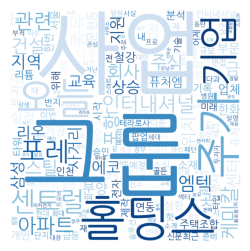

In [21]:
fig = plt.figure(figsize=(3, 3))  # 그림 크기 설정
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Clustering

## KoNLPy를 이용한 단어 분석
- 형태소 분석
 - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발
 - Kkma: 꼬꼬마. 서울대학교 IDS 연구실 개발
 - Komoran: 코모란. Shineware에서 개발
 - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
 - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기

##### Komoran를 활용하여 첫 번째 문장의 형태소를 분석 (Okt와 동일한 방식)

### CounterVectorizer 작동 예제

CountVectorizer: 단어들의 카운트(출현 빈도)로 문서를 벡터화 (단어는 모두 소문자로 변환시켜서 셈)

In [24]:
# example data
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

#### 1-gram (각 단어를 feature로)

##### countvectorizer 생성 및 학습

In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X
# 4 문서 갯수 9: 단어 갯수

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [28]:
type(X)

scipy.sparse._csr.csr_matrix

- scipy.sparse.csr.csr_matrix: compressed spares row matrix
- toarray(): csr_mtrix를 dense ndarry representation으로 반환해주는 메소드

##### compressed sparse matrix를 array 형태로 변환

In [ ]:
# 'This is the first document.', [0, 1, 1, 1, 0, 0, 1, 0, 1]

X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [29]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

##### 단어 출현 빈도 확인

In [30]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

#### n-gram (여러 단어를 묶어서 하나의 feature로)
e.g. ngram_range = (2, 2)

##### countvectorizer 생성 및 학습

In [31]:
vectorizer = CountVectorizer(ngram_range=(2,2)) # (2, 2) only bi-gram
X = vectorizer.fit_transform(corpus)

##### feature names 확인 & compressed sparse matrix to array & 단어 출현 빈도 확인

In [32]:
print(vectorizer.get_feature_names_out())
print("")
print(X.toarray())
print("")
print(vectorizer.vocabulary_)

['and this' 'document is' 'first document' 'is the' 'is this'
 'second document' 'the first' 'the second' 'the third' 'third one'
 'this document' 'this is' 'this the']

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]

{'this is': 11, 'is the': 3, 'the first': 6, 'first document': 2, 'this document': 10, 'document is': 1, 'the second': 7, 'second document': 5, 'and this': 0, 'the third': 8, 'third one': 9, 'is this': 4, 'this the': 12}


### Countervectorizer using custom tokenizer

##### 커스텀 토크나이저 정의
noun_freq (2번 이상 사용된 명사들), komoran.nouns() 활용

In [33]:
nouns = []
for sentence in descriptions:
    nouns += parser_kor.nouns(sentence)
noun_counter = Counter(nouns)
noun_freq = [word for word, freq in noun_counter.items() if freq >= 2]

In [ ]:
noun_freq[:5] # 2번 이상 나온 word

['뮤직', '뷰티풀', '민트', '라이프', '포스코']

In [34]:
# 문장 --> tokenizer --> 명사만 남김
# 명사 중에서 전체 에서에서 2번 이상 나온 경우의 명사 남김
# 미리 2번 이상 나오는 단어 집합이 필요합니다. (noun_freq 를 미리 만들어야함)

def custom_tokenizer(sentence):
    # 2번 이상 출현한 명사만 찾아주는 토크나이저
    return [word for word in parser_kor.nouns(sentence) if word in noun_freq]

In [35]:
print(custom_tokenizer(descriptions[0]))
print(custom_tokenizer(descriptions[1]))
print(custom_tokenizer(descriptions[2]))

['뮤직', '뷰티풀', '민트', '라이프', '포스코', '팝업', '이번', '뷰티풀', '민트', '라이프', '포스코', '뮤직', '등', '수', '사실', '포스코']
['출처', '포스코', '그룹', '주가', '이후', '급등', '후', '이후', '하락', '포스코', '인터내셔널', '포스코', '그룹', '가장']
['현', '포스코', '센트럴', '포레', '부적', '격', '세대', '선착순', '공급', '안내', '현', '센트럴', '포레', '포스코', '아파트', '부산광역시', '남구', '문현동', '번지', '일원', '위치', '지역', '주택조합', '아파트', '포스코', '건설', '시공', '예정']


In [36]:
custom_tokenizer(descriptions[0])

['뮤직',
 '뷰티풀',
 '민트',
 '라이프',
 '포스코',
 '팝업',
 '이번',
 '뷰티풀',
 '민트',
 '라이프',
 '포스코',
 '뮤직',
 '등',
 '수',
 '사실',
 '포스코']

##### CountVectorizer에 커스텀 토크나이저 적용하여 countervectorize 생성 및 학습

In [37]:
# 문장 -> 벡터화 (TF-IDF) -> 비슷한 벡터끼리 모으기 --> 클러스터가 만들어짐
# TF-IDF 하려면 counter vecterizer를 만들어야함


vectorizer = CountVectorizer(tokenizer=custom_tokenizer) # 한국어 pos, 명사, freq>2
X = vectorizer.fit_transform(descriptions) # 한국어를 잘하게 된다.
X
# 100 : 전체 document 수 ( 블로그 글 갯수)
# 395 : 명사, frequency 2 이상인 명사들의 집합

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<100x395 sparse matrix of type '<class 'numpy.int64'>'
	with 1206 stored elements in Compressed Sparse Row format>

##### feature names 확인 & compressed sparse matrix to array & 단어 출현 빈도 확인

In [38]:
vectorizer.get_feature_names_out()

array(['가운데', '가장', '강', '강남구', '강세', '강의', '강판', '개', '개발', '개인', '거',
       '거래', '건물', '건설', '걸', '것', '게', '격', '견적', '경우', '계', '계열',
       '고등학교', '골든', '곳', '공급', '공원', '공인', '공장', '관련', '관심', '광양', '교육',
       '국내', '규모', '그', '그동안', '그루', '그룹', '글', '금', '금요일', '급등', '기간',
       '기념', '기록', '기본', '기술', '기억', '기업', '기자', '기획', '길', '김승환', '김해',
       '꼭', '나눔', '날', '남구', '내', '내용', '년', '노량진', '다과', '다른', '단일',
       '단지', '달', '당사', '대비', '대세', '대장', '대책', '대치동', '대표', '대한', '대해',
       '더', '도안', '돌파', '동문', '동안', '동탄', '듯', '등', '디자인', '때', '때문',
       '라벨', '라이프', '로', '를', '리온', '리튬', '마련', '마루', '만', '맛집', '맞춤',
       '매도', '매매', '매수', '매장', '면접', '몇', '모집', '목표', '문', '문현동', '뭐',
       '뭘', '뮤직', '미래', '미술관', '민트', '및', '박물관', '반', '발표', '방법', '배당금',
       '배터리', '밸류', '번', '번지', '벡셀', '별', '별로', '병원', '보고', '보상', '보유',
       '복기', '부', '부문', '부산광역시', '부적', '분', '분석', '분양', '뷰', '뷰티풀', '비즈',
       '빛', '사거리', '사건', '사람', '사명', '사무소', '사실', '사업', '사옥', '사진',

In [39]:
X.toarray()[0] # 첫번째 블로그 글, 0 이 이미 많음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
vectorizer.vocabulary_

{'뮤직': 111,
 '뷰티풀': 141,
 '민트': 114,
 '라이프': 89,
 '포스코': 356,
 '팝업': 351,
 '이번': 243,
 '등': 84,
 '수': 178,
 '사실': 149,
 '출처': 331,
 '그룹': 38,
 '주가': 291,
 '이후': 246,
 '급등': 42,
 '후': 393,
 '하락': 366,
 '인터내셔널': 250,
 '가장': 1,
 '현': 377,
 '센트럴': 170,
 '포레': 355,
 '부적': 136,
 '격': 17,
 '세대': 166,
 '선착순': 164,
 '공급': 25,
 '안내': 202,
 '아파트': 201,
 '부산광역시': 135,
 '남구': 58,
 '문현동': 108,
 '번지': 124,
 '일원': 255,
 '위치': 235,
 '지역': 308,
 '주택조합': 298,
 '건설': 13,
 '시공': 188,
 '예정': 221,
 '마루': 95,
 '정부': 280,
 '입지': 257,
 '소개': 171,
 '시공사': 189,
 '사업': 150,
 '승인': 185,
 '신청': 195,
 '오늘': 222,
 '중': 301,
 '대해': 76,
 '조합원': 288,
 '접수': 276,
 '소식': 173,
 '자격': 258,
 '분양': 139,
 '정보': 279,
 '핫': 374,
 '곳': 24,
 '연동': 215,
 '더': 77,
 '애비뉴': 203,
 '제주': 285,
 '주한': 299,
 '병원': 128,
 '주변': 296,
 '것': 15,
 '확인': 389,
 '엠텍': 213,
 '리튬': 93,
 '주': 290,
 '이': 242,
 '회사': 391,
 '기업': 49,
 '의': 240,
 '공원': 26,
 '퓨쳐': 363,
 '엠': 212,
 '뭐': 109,
 '실적': 198,
 '번': 123,
 '미래': 112,
 '요새': 229,
 '시장': 191,
 '주식': 2

## TF-IDF
어떤 단어의 빈도가 문서 내에서는 높은 편이 아니더라도, 해당 단어가 나타나는 문서가 적다면 문서를 대표하는 중요한 단어가 될 수 있음
![image.png](attachment:image.png)

##### tf-idf 학습

In [42]:
tfidf = TfidfTransformer()
# X " counter vectorize result"
X_tfidf = tfidf.fit_transform(X)

##### tf-idf 하기 전/후 비교

In [43]:
X.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X_tfidf.toarray()[0] # 중요도를 곱해줌

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## clustering
- 텍스트를 벡터화 완료
- 벡터끼리의 연산 가능해짐


##### Spherical k-means
- sparse vector의 clustering을 위해 활용
- cosine distance 활용
- 모든 데이터 포인트를 unit vector가 되도록 변형해서 이용
- centroid로 한 군집에 포함된 모든 벡터의 평균을 사용하지 않고, 벡터의 합을 L2 normalize 하여 centroid를 unit vector로 만듦
- 특별한 initialize 방법 사용

This package is implementation of Improving spherical k-means for document clustering: Fast initialization, sparse centroid projection, and efficient cluster labeling (Kim et al., 2020).

##### spherical k-means 인스턴스 생성 및 학습
cluster 수 = 4

In [44]:
np.int = np.int32
kmeans = SphericalKMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_tfidf)
labels

array([1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 3, 1, 3, 1, 3, 1, 0, 3, 2, 0,
       1, 3, 2, 1, 3, 3, 1, 0, 1, 1, 1, 3, 3, 1, 3, 1, 2, 3, 0, 1, 2, 2,
       1, 0, 1, 1, 1, 3, 2, 1, 3, 0, 2, 1, 1, 1, 3, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 2, 1, 1, 3, 1, 1, 3, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 3,
       0, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3])

In [45]:
# descriptions, clustering 결과 dataframe 생성
df_descriptions = pd.DataFrame({"description": descriptions, "label": labels})
df_descriptions.head()

,description,label
0,2023 뮤직 페스티벌 뷰민라 뷰티풀 민트 라이프 <b>포스코</b> 팝업 포석호 ...,1
1,"© traxer, 출처 Unsplash <b>포스코</b> 그룹주가 3월 이후 수급...",2
2,문현 <b>포스코</b> 센트럴포레 부적격세대 선착순 공급안내 문현 센트럴포레 <b...,0
3,문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트 정부의 부동산 규제 완화책 ...,0
4,문현 센트럴포레 - 시공사 <b>포스코</b> 건설 2022년 4월 사업승인 신청을...,0


##### 군집별 상위 10개의 최빈 단어 비교

In [47]:
for i in range(4):
    lists = df_descriptions.loc[df_descriptions["label"] == i, "description"].to_list()
    nouns = []
    for sentence in lists:
        nouns += custom_tokenizer(sentence)
    print(f"cluster{i}: {Counter(nouns).most_common(10)}")
    print("")

cluster0: [('포스코', 36), ('현', 13), ('센트럴', 13), ('포레', 13), ('아파트', 11), ('건설', 9), ('지역', 8), ('위치', 7), ('사업', 6), ('더', 6)]

cluster1: [('포스코', 99), ('홀딩스', 13), ('그룹', 12), ('오늘', 8), ('주', 8), ('인터내셔널', 7), ('삼성', 7), ('등', 6), ('센터', 6), ('금', 6)]

cluster2: [('포스코', 40), ('스틸', 9), ('엠텍', 9), ('그룹', 7), ('리온', 7), ('종목', 7), ('상한', 5), ('급등', 4), ('어제', 4), ('주', 4)]

cluster3: [('포스코', 48), ('기업', 13), ('주가', 13), ('사업', 10), ('엠', 7), ('교육', 7), ('케미칼', 6), ('홀딩스', 6), ('퓨처엠', 5), ('에코', 5)]



## 클러스터별 워드 클라우드

##### 워드클라우드 학습하는 함수 만들기

In [49]:
def get_wordcloud(texts):
    # 문장리스트를 받아와
    # 커스텀 토크나이저를 이용해 최소 2번 이상 출현한 명사들만 추출
    # Counter를 이용하여 명사별 빈도를 측정하고
    # wordcloud 학습
    wordcloud = WordCloud(
        font_path = './NanumGothic.ttf', #한글 사용 위해서
        background_color='white',       # 배경 색깔 정하기
        colormap = 'Accent_r',          # 폰트 색깔" Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
        width = 800, height = 800)

    nouns = [noun for text in texts for noun in custom_tokenizer(text)]
    noun_counter = Counter(nouns)
    wordcloud.generate_from_frequencies(noun_counter)
    return wordcloud

##### 전체 데이터로 워드클라우드 만들기

In [50]:
wc = get_wordcloud(descriptions)

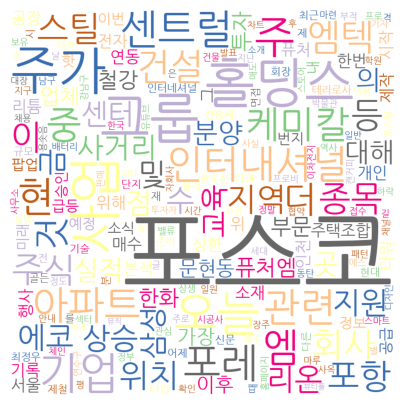

In [51]:
fig = plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

##### 클러스터별 워드클라우드 만들기

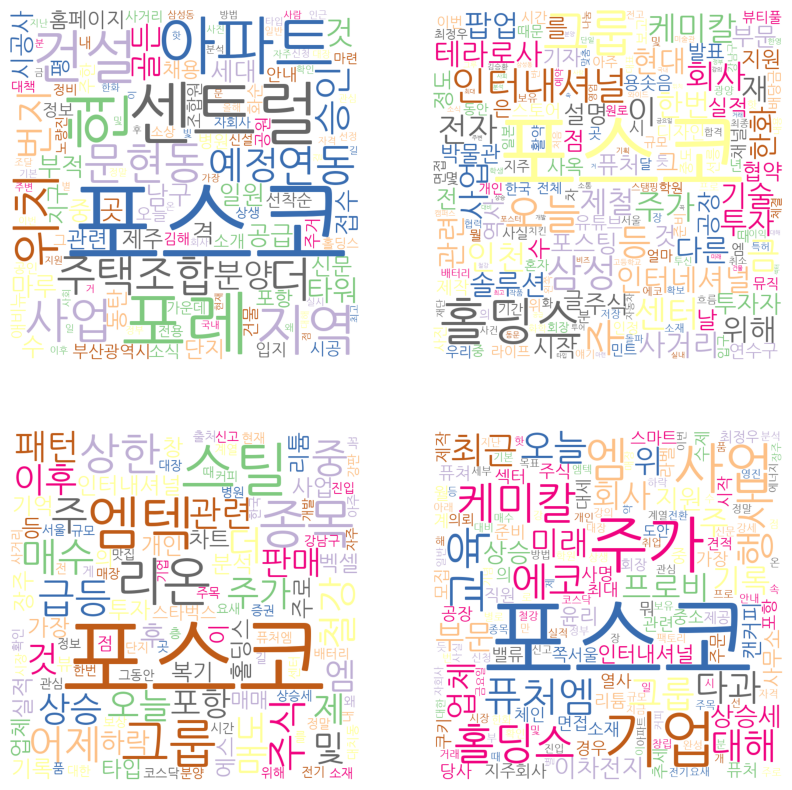

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    texts = df_descriptions.loc[df_descriptions['label']==i, "description"].to_list()
    wc = get_wordcloud(texts)
    axes[i//2, i%2].imshow(wc)
    axes[i//2, i%2].axis("off")
plt.show()